In [1]:
from pylab import *

In [2]:
from sklearn.datasets import make_classification

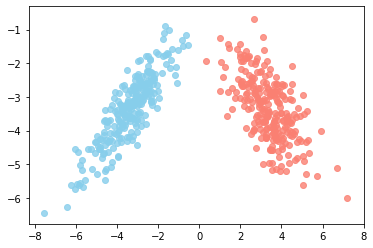

In [3]:
X, Y = make_classification(
    n_samples=500, 
    n_features=2, 
    n_clusters_per_class=1, 
    n_redundant=0,
    class_sep=3.4,
    random_state=20
)

Y = Y.reshape(500, 1)

scatter(X[Y[:,0]==0, 0], X[Y[:,0]==0, 1], color="skyblue", alpha=0.8)
scatter(X[Y[:,0]==1, 0], X[Y[:,0]==1, 1], color="salmon", alpha=0.8)

show()

In [4]:
class LogisticRegresion():
    def __init__(self, n, act_f, cost_f, cost_fd):
        self._act_f = act_f
        self.cost_f = cost_f
        self._cost_fd = cost_fd
        
        self.bias = rand(1, 1)    *2-1
        self.params = rand(n, 1)  *2-1
        
    def __call__(self, x):
        return self.forward(x)
    
    def forward(self, x):
        z = x @ self.params + self.bias
        return self._act_f(z)
    
    def train(self, X, Y, lr=0.0000001):
        y_ = self.forward(X)
    
        delta_b = sum(self._cost_fd(y_, Y))
        
        delta_p = zeros_like(self.params)
        
        for i in range(0, len(self.params)):
            delta_p[i] = sum(self._cost_fd(y_, Y) * X[:,i])
            
        self.bias = self.bias - lr*delta_b
        self.params = self.params - lr*delta_p

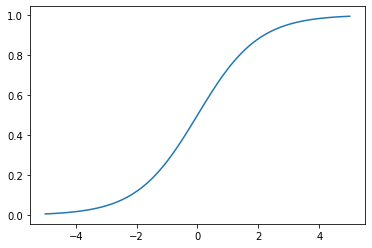

In [5]:
# Funcion de activacion sigmoide

sigm = lambda x: 1 / (1 + np.e ** (-x))

_x = linspace(-5, 5, 100)

plot(_x, sigm(_x))

show()

In [6]:
# Función costo
cost_fn = lambda y_, y: (sum(y*(log(y_))+(1-y)*log(1-y_)))*(-1/len(y))

In [7]:
# Derivada de la funcion de costo (Para gradient descent)
cost_fd = lambda y_, y: (y_ - y)

In [8]:
model = LogisticRegresion(2, sigm, cost_fn, cost_fd)

In [9]:
import time
from IPython.display import clear_output

def train_model(model, x_data, y_data, epochs=1000, lr=0.0000001):
    loss = []
    
    for i in range(epochs):
        model.train(X, Y, lr=lr)
        pY = model(x_data)
        
        if i % 25 == 0:
            loss.append(model.cost_f(pY, y_data))
            
            res = 50
            
            _x0 = np.linspace(-8, 8, res)
            _x1 = np.linspace(0, -7, res)
            
            _Y = np.zeros((res, res))
            
            for i0, x0 in enumerate(_x0):
                for i1, x1 in enumerate(_x1):
                    _Y[i0, i1] = model(np.array([[x0, x1]]))
                    
            plt.pcolormesh(_x0, _x1, _Y.T, cmap="coolwarm")
            
            
            plt.scatter(X[Y[:,0]==0, 0], X[Y[:,0]==0, 1], color="skyblue", alpha=0.8)
            plt.scatter(X[Y[:,0]==1, 0], X[Y[:,0]==1, 1], color="salmon", alpha=0.8)
            
            clear_output(wait=True)
            plt.show()
            plt.plot(range(len(loss)), loss)
            plt.show()
            time.sleep(0.5)            

In [10]:
X_mean = np.mean(X, axis=0, keepdims=True)
X_var = np.var(X, axis=0, keepdims=True)

X_ = (X - X_mean) / np.sqrt(X_var)

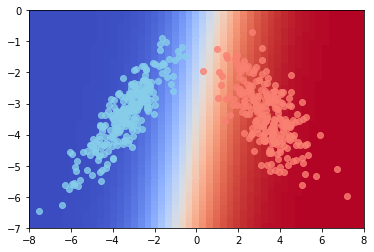

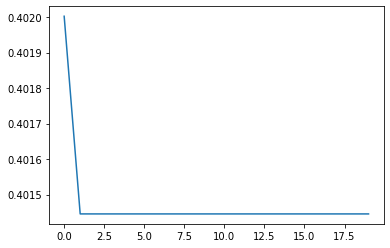

In [11]:
train_model(model, X_, Y, epochs=500, lr=0.000003)

# NOTA: La implementación presenta deficiencias dependiendo de como se hallan inicializado los parámetros aleatorios del modelo.

#### Ver: Regresion Logistica implementada en PyTorch y en TF (Tensorflow)